inizializzare il file importando il dataset

In [2]:
from sklearn.neural_network import MLPClassifier
from torchvision.datasets import MNIST
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

mnist_train = MNIST(root="../mnist",
                    train=True,
                    download=True)
mnist_test = MNIST(root="../mnist",
                    train=False,
                    download=True)

mnist_train_data, mnist_train_targets = mnist_train.data.numpy(), mnist_train.targets.numpy()
mnist_test_data, mnist_test_targets = mnist_test.data.numpy(), mnist_test.targets.numpy()

mnist_train_data = mnist_train_data.reshape(60000, 28*28)
mnist_test_data = mnist_test_data.reshape(10000, 28*28)

mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

random_state = 0



100%|██████████| 9912422/9912422 [00:00<00:00, 110496117.74it/s]


Extracting ../mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 78915761.45it/s]


Extracting ../mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34491847.69it/s]


Extracting ../mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15475652.94it/s]

Extracting ../mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



# Come cambia l’accuratezza di riconoscimento sui pattern di test rumorosi se viene introdotto rumore anche nei pattern di training?

funzione per aggiungere rumore alle immagini

In [3]:

def _inject_Gaussian_noise(mnist_data, noise_level):
  # creiamo una matrice di rumore della dimensione di un'immagine
  random_gaussian_tensor = np.random.normal(loc = 0, scale = noise_level, size = (1,784))   
  # aggiungiamo il rumore ai pixel originali, tagliando i valori minori di 0 o maggiori di 1
  noisy_images = mnist_data + random_gaussian_tensor
  noisy_images = np.clip(noisy_images,0,1)
  return noisy_images

In [ ]:
def _inject_blur(mnist_data, noise_level):
  # creiamo una matrice di rumore della dimensione di un'immagine
  random_gaussian_tensor = np.random.normal(loc = 0, scale = noise_level, size = (1,784))   
  # aggiungiamo il rumore ai pixel originali, tagliando i valori minori di 0 o maggiori di 1
  noisy_images = mnist_data + random_gaussian_tensor
  noisy_images = np.clip(noisy_images,0,1)
  return noisy_images

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

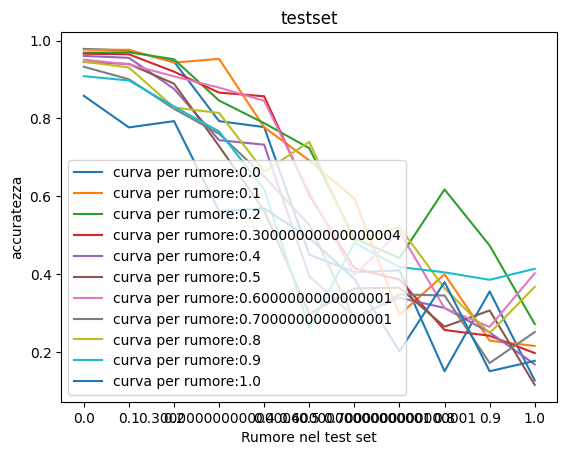

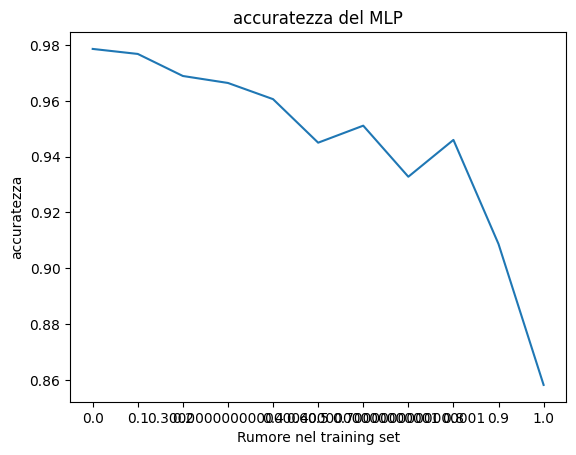

In [ ]:
livelli_di_rumore = np.linspace(0,1,11)

accuratezza = []
NoisyTestaccuracy = []
MLP = MLPClassifier(hidden_layer_sizes=(500, 500,500),
                    max_iter = 10,
                    random_state=random_state)

plt.figure(1) 
# testiamo il modello su stimoli contenenti un livello di rumore crescente:
for livello in livelli_di_rumore:
  mnist_train_data_noisy = _inject_Gaussian_noise(mnist_train_data,livello)
  MLP= MLP.fit(mnist_train_data_noisy, mnist_train_targets)
  for livellotest in livelli_di_rumore:
    mnist_test_data_noisy = _inject_Gaussian_noise(mnist_test_data,livellotest)
    test_predictions = MLP.predict(mnist_test_data_noisy)
    NoisyTestaccuracy.append(MLP.score(mnist_test_data_noisy, mnist_test_targets))
  _ = plt.title("testset")
  _ = plt.xlabel("Rumore nel test set")
  _ = plt.ylabel("accuratezza")
  _ = plt.plot(list(map(str,livelli_di_rumore)), NoisyTestaccuracy,label="curva per rumore:"+str(livello))
  NoisyTestaccuracy=[]
  test_predictions = MLP.predict(mnist_test_data)
  accuratezza.append(MLP.score(mnist_test_data, mnist_test_targets))
  _ = plt.legend()
plt.figure(2)
_ = plt.plot(list(map(str,livelli_di_rumore)), accuratezza)
_ = plt.xlabel("Rumore nel training set")
_ = plt.ylabel("accuratezza")
_ = plt.title("accuratezza del MLP")
